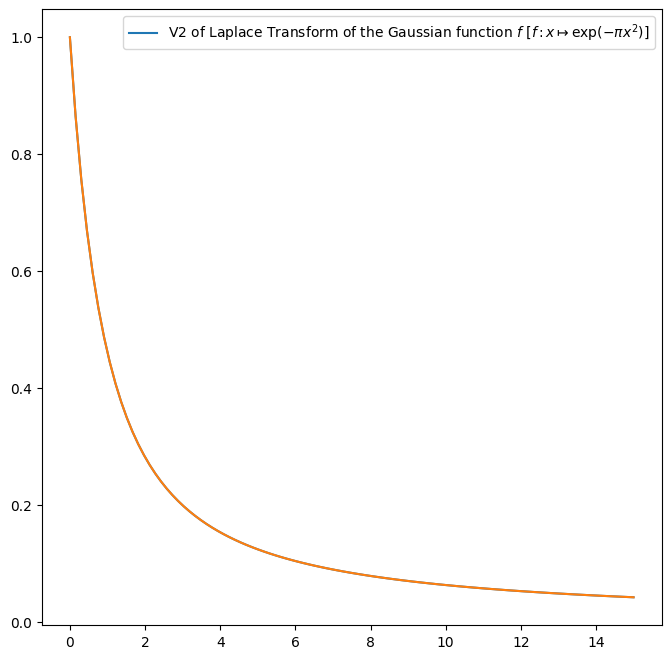

In [69]:
import numpy as np
from scipy import special
from scipy import stats
from tqdm import tqdm
import matplotlib.pyplot as plt
x = np.linspace(0, 15, 100,dtype=np.float64)
laplace_gaussian_func = lambda s: np.exp(np.pi*(s**2)/4)*special.erfc(s*np.sqrt(np.pi)/2) 
laplace_gaussian_func2 = lambda s: special.erfcx(s*np.sqrt(np.pi)/2)


plt.figure(figsize=(8,8))
plt.plot(x,laplace_gaussian_func(x))

plt.legend([r'Laplace Transform of the Gaussian function $f$ [$f:x\mapsto \exp(-\pi x^2 $)]'])
plt.plot(x,laplace_gaussian_func2(x))
plt.legend([r'V2 of Laplace Transform of the Gaussian function $f$ [$f:x\mapsto \exp(-\pi x^2 $)]'])

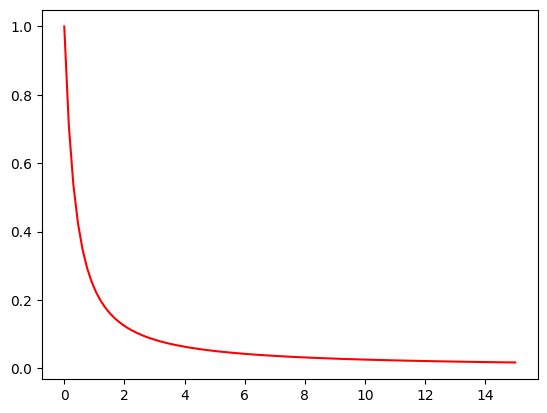

In [28]:
laplace_gaussian_distrib = lambda s: laplace_gaussian_func2(np.sqrt(2*np.pi)*s)

plt.plot(x,laplace_gaussian_distrib(x),'r')


In [45]:
rel_variance_IS_1D = lambda u: (laplace_gaussian_distrib(2*u)/laplace_gaussian_distrib(u)**2)-1
plt.plot(x,rel_variance_IS_1D(x),'g')
plt.close()

In [43]:
proba_to_threshold = lambda p: stats.norm.isf(p)
def rel_variance_IS_1D_from_proba(p):
    return rel_variance_IS_1D(proba_to_threshold(p))



([<matplotlib.axis.XTick at 0x7feee6c0ab30>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20'),
  Text(21.0, 0, '21'),
  Text(22.0, 0, '22'),
  Text(23.0, 0, '23'),
  Text(24.0, 0, '24')])

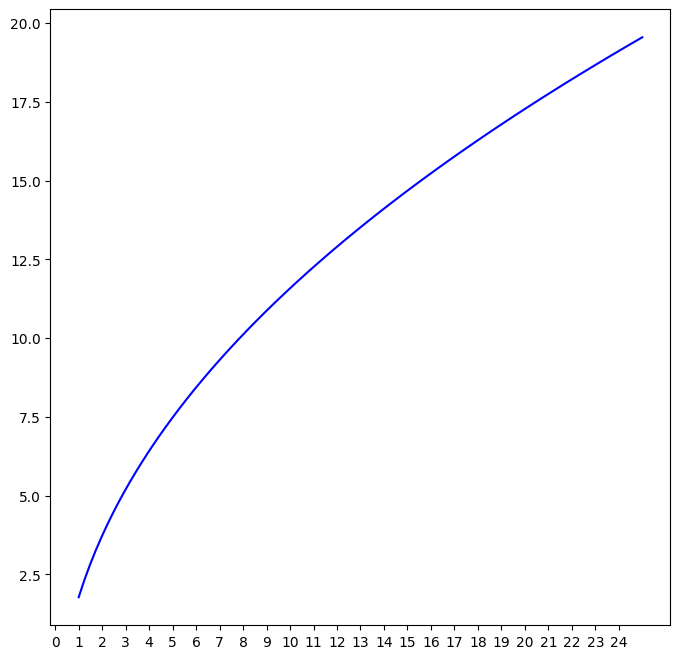

In [66]:
proba_range = np.logspace(-25,-1.,100)
plt.figure(figsize=(8,8))
proba_range = proba_range[::-1 ]
log10_proba_range = -np.log10(proba_range)
plt.plot(log10_proba_range,rel_variance_IS_1D_from_proba(proba_range),'b')
plt.xticks(np.arange(0, 25, 1.0))


In [78]:
np.random.normal(0,1,int(1e8))

array([-0.46227085, -1.8283266 , -0.0163546 , ..., -0.59233354,
        0.63498285, -1.31628817])

In [ ]:
np.random.no

In [79]:
proba_range = np.logspace(-15,-1.,10)
log10_proba_range= -np.log10(proba_range)
thresh_range = proba_to_threshold(proba_range)
normal_dist = stats.norm(loc=0,scale=1)

def IS_1D(N,thresh,batch_size):
    p_IS=0
    bias_dist = stats.norm(loc=thresh)
    for i in range(N//batch_size):
        x = thresh+ np.random.normal(size=batch_size)
        pdf_ratio = stats.norm.pdf(x)/stats.norm(loc=thresh).pdf(x)
        p_local = ((x>0).astype(float) *pdf_ratio).mean()
        p_IS=(i*batch_size*p_IS+p_local*batch_size)/(i*batch_size+batch_size)
    if N%batch_size!=0:
        x = np.random.normal(size=N%batch_size)
        pdf_ratio = stats.norm.pdf(x)/stats.norm(loc=thresh).pdf(x)
        p_local = ((x>0).astype(float) *pdf_ratio).mean()
        p_IS=(i*batch_size*p_IS+p_local*batch_size)/(i*batch_size+batch_size)
        p_IS=(N//batch_size*batch_size*p_IS+p_local*(N%batch_size))/(N//batch_size*batch_size+N%batch_size)
    return p_IS
n_rep = 100
proba_ests=[]
for p in proba_range:
    proba_ests.append([IS_1D(10000000,thresh,10000000) for thresh in thresh_range])
proba_ests=np.array(proba_ests)
variance_ests= np.var(proba_ests,axis=1)
variance_rel = variance_ests/p**2
plt.plot(log10_proba_range,variance_rel,'r')

AttributeError: module 'scipy.stats' has no attribute 'normal'